In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredText
import numpy as np
import pandas as pd
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [3]:
data_config = [
    '2GeV_e',
    '4GeV_e',
    '8GeV_e',
    '4GeV_pi',
    '8GeV_pi'
]
def Load_Store_Data(data):
    data_file = []
    df = {}
    for i in range(len(data_config)):
        DATADIR = "/home/shivesh/Documents/physics/PhD/beamtest/DDC2/pingu/latest/processed/l2/bwd_1/%s.hd5" %(data[i])
        data_file.append(DATADIR)
        store = pd.HDFStore(data_file[i])
        #creates a file
        df[i] = store['df']
        #stores data in a data frame
        store.close()
        #closes file
    return df

data_df = Load_Store_Data(data_config)
print data_df[2]

     isamp  adc     timestamp  index  voltage     charge
0        0   13  1.497856e+09      0     2.86  62.260190
1        4   11  1.497856e+09      0     2.42  62.260190
2        8   14  1.497856e+09      0     3.08  62.260190
3       12   10  1.497856e+09      0     2.20  62.260190
4       16   10  1.497856e+09      0     2.20  62.260190
5       20   11  1.497856e+09      0     2.42  62.260190
6       24   10  1.497856e+09      0     2.20  62.260190
7       28   11  1.497856e+09      0     2.42  62.260190
8       32   12  1.497856e+09      0     2.64  62.260190
9       36   14  1.497856e+09      0     3.08  62.260190
10      40   10  1.497856e+09      0     2.20  62.260190
11      44   12  1.497856e+09      0     2.64  62.260190
12      48    9  1.497856e+09      0     1.98  62.260190
13      52    9  1.497856e+09      0     1.98  62.260190
14      56   10  1.497856e+09      0     2.20  62.260190
15      60   11  1.497856e+09      0     2.42  62.260190
16      64   12  1.497856e+09  

In [4]:
CHARGE_BINS = 16

el_charges_2 = el_df_2['charge'].unique()
el_charges_4 = el_df_4['charge'].unique()
el_charges_8 = el_df_8['charge'].unique()

#a 1D array that lists all charge values that are unique (no repeated values)

pi_charges_4 = pi_df_4['charge'].unique()
pi_charges_8 = pi_df_8['charge'].unique()
c_max = np.max([np.max(el_charges_2),np.max(el_charges_4), np.max(el_charges_8), np.max(pi_charges_4),np.max(pi_charges_8)])
#Compares max value of electron and pion 1D array of unique charge values and returns overall maximum from the two
charge_binning = np.linspace(0, c_max, CHARGE_BINS+1)
#array that starts from 0 to max charge value that allows for 17 bins

NameError: name 'el_df_2' is not defined

In [25]:
#el_split_charge = []
pi_split_charge = []
#empty 1D arrays
for ch_idx in xrange(CHARGE_BINS):
#assign ch_idx to a different element of the bins

    #el_split_charge.append(el_df_2[(el_df_2['charge'] > charge_binning[ch_idx]) & \
     #                            (el_df_2['charge'] < charge_binning[ch_idx+1])])
    
#fills empty array with condition : each charge value must lie in between a charge_binning interval. This splits the
#charges into bins e.g. first bin contains charge values between 0-4.86 and etc
    pi_split_charge.append(pi_df_8[(pi_df_8['charge'] > charge_binning[ch_idx]) & \
                                 (pi_df_8['charge'] < charge_binning[ch_idx+1])])  

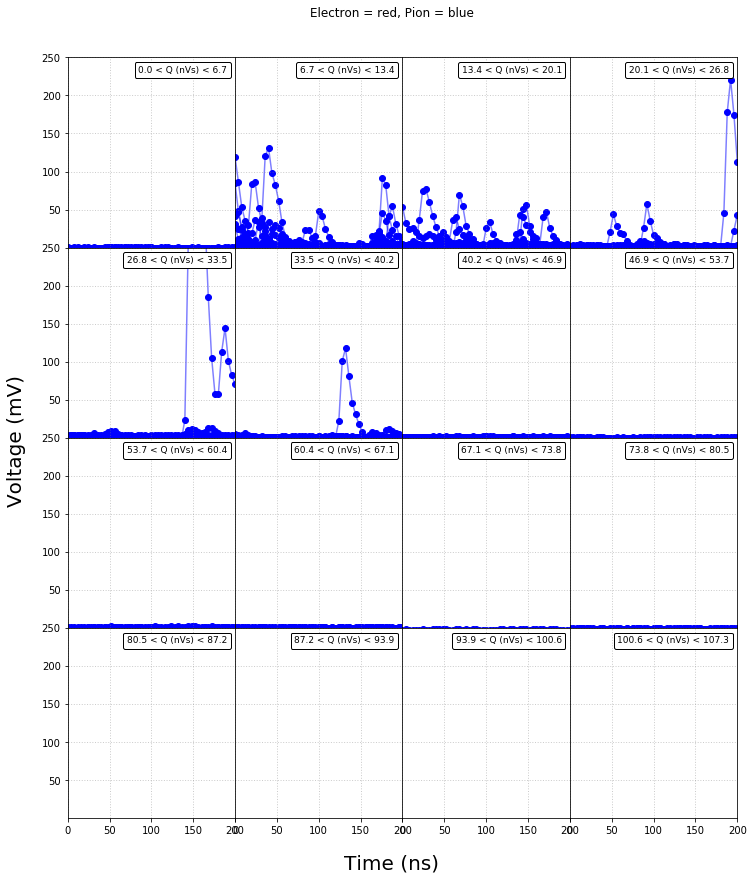

In [30]:
DIMS = (4, 4)

fig = plt.figure(figsize=[12, 14])
fig.suptitle(r'Electron = red, Pion = blue', y=0.93)
#defines figure sizes and titles

gs = gridspec.GridSpec(*DIMS)
#specifies the geometry of the grid, 4 rows and 4 columns of subplots
gs.update(hspace=0., wspace=0.)
for ch_idx in xrange(CHARGE_BINS):
    #gs0 = gridspec.GridSpecFromSubplotSpec(
    #    1, 1, subplot_spec=gs[ch_idx], wspace=0, hspace=0, width_ratios=[1,1]
    #)
    
    ax0 = fig.add_subplot(gs[ch_idx])
    #add a subplot with the dimensions and layout specified in gs for each bin
    
    #el_waveforms = el_split_charge[ch_idx]
    #assigns the binned charge array to a variable and loops over each bin index
    pi_waveforms = pi_split_charge[ch_idx]
    
    #el_idx = el_waveforms['index'].unique()
    #each charge value has an associated index number. This creates an array of all the index numbers where the charge 
    #meets the previous conditions and returns only unique values. E.g charge = 1.65 refers to index 286 in the first condition
    #that states charge between 0-4. lists all appropriate indices in each bin.
    pi_idx = pi_waveforms['index'].unique()
    
    #for idx in el_idx:
        #loop over each of these indices e.g bin 1 286, 388 etc
        
        #wv_df = el_waveforms[el_waveforms['index'] == idx]
        #only returns the data corresponding to each index specified in el_idx e.g all data for 286 index etc

        #isamp, voltage = np.array(wv_df['isamp']), np.array(wv_df['voltage'])
        #from wv_df that prints out the whole data line, create an array that picks out only the isamp and voltage value
        #with the index specified by idx. e.g isamp value for 286, then 388 etc in an array
        
        
        #ax0.scatter(isamp, voltage, marker='o', color='red')
        #ax0.plot(isamp, voltage, color='red', alpha=0.5)
        #for eacg subplot, plot the isamp vs voltage for each charge bin in seperate subplots
        
    for idx in pi_idx:
        wv_df = pi_waveforms[pi_waveforms['index'] == idx]
        isamp, voltage = np.array(wv_df['isamp']), np.array(wv_df['voltage'])
        ax0.scatter(isamp, voltage, marker='o', color='blue')
        ax0.plot(isamp, voltage, color='blue', alpha=0.5)
    
    ax0.set_xlim(0, 200)
    ax0.set_ylim(0, 250)
    #setting x and y axis ranges
    
    for xmaj in ax0.xaxis.get_majorticklocs():
        ax0.axvline(x=xmaj, ls=':', color='gray', alpha=0.4, linewidth=1)
    if ch_idx < CHARGE_BINS - DIMS[1]:
        ax0.get_xaxis().set_ticks([])
    xticks = ax0.yaxis.get_major_ticks()
    xticks[0].set_visible(False)
        
    for ymaj in ax0.yaxis.get_majorticklocs():
        ax0.axhline(y=ymaj, ls=':', color='gray', alpha=0.4, linewidth=1)
    yticks = ax0.yaxis.get_major_ticks()
    yticks[0].set_visible(False)
    if ch_idx % DIMS[1] != 0:
        ax0.get_yaxis().set_ticks([])
    
    at = AnchoredText(r'{0:.1f} < Q (nVs) < {1:.1f}'.format(charge_binning[ch_idx], charge_binning[ch_idx+1]),
                      prop=dict(size=9), frameon=True, loc=1)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax0.add_artist(at)

fig.text(0.055, 0.5, r'Voltage (mV)', rotation='vertical', va='center', size=20)
fig.text(0.5, 0.075, r'Time (ns)', ha='center', size=20)
fig.savefig('/Users/soniyasamani/Project-MSci/Image/q_overlay_8GeV_pi.png')
#fig.savefig('8GeV_pi.hd5/images/q_overlay.png')